# Hidden Markov Model to estimate the parameters of stock market

In [1]:
!pip install hmmlearn

In [2]:
import numpy as np
import pandas as pd
path = "../Dataset/AXISBANK.NS.csv"
prices_hist_data = pd.read_csv(path)



prices_hist_data = prices_hist_data.dropna()
prices_hist_data = prices_hist_data.reset_index(drop=True)
prices_hist_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-29,564.849976,617.900024,558.000000,610.650024,607.715393,49195226.0
1,2018-11-05,628.900024,633.000000,600.049988,613.200012,610.253174,55011591.0
2,2018-11-12,612.549988,636.700012,604.049988,619.799988,616.821411,49062729.0
3,2018-11-19,619.799988,629.400024,608.599976,614.549988,611.596619,30494480.0
4,2018-11-26,618.650024,638.700012,616.500000,625.750000,622.742737,58443729.0
...,...,...,...,...,...,...,...
256,2023-09-25,1015.200012,1041.000000,1004.000000,1036.699951,1036.699951,44017306.0
257,2023-10-02,1036.699951,1044.699951,988.849976,1000.950012,1000.950012,47413699.0
258,2023-10-09,994.799988,1031.000000,988.250000,994.049988,994.049988,37041880.0
259,2023-10-16,990.000000,1014.700012,977.750000,980.349976,980.349976,29071998.0


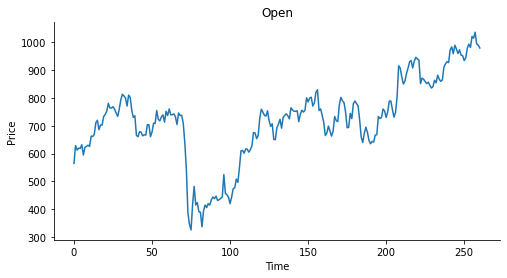

In [331]:
from matplotlib import pyplot as plt
prices_hist_data['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.xlabel("Time")
plt.ylabel("Price")
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
returns_hist_data = {}
total_data_time = len(prices_hist_data)
returns_hist_data[prices_hist_data['Date'][0]] = 0
prev_price = float(prices_hist_data['Adj Close'][0])

for i in range(1,total_data_time):
    curr_price = float(prices_hist_data['Adj Close'][i])
    returns_hist_data[prices_hist_data['Date'][i]] = (curr_price-prev_price)/prev_price
    prev_price = curr_price

returns_hist_data = pd.DataFrame(data=returns_hist_data.items(),columns=['Date','Returns'])
print(returns_hist_data)

           Date   Returns
0    2018-10-29  0.000000
1    2018-11-05  0.004176
2    2018-11-12  0.010763
3    2018-11-19 -0.008471
4    2018-11-26  0.018225
..          ...       ...
256  2023-09-25  0.018119
257  2023-10-02 -0.034484
258  2023-10-09 -0.006893
259  2023-10-16 -0.013782
260  2023-10-23  0.022849

[261 rows x 2 columns]


In [5]:
import hmmlearn.hmm as hmm

observed_returns = np.array(returns_hist_data['Returns'])

hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=10000)

hmm_model.fit(observed_returns.reshape(-1,1))

means = hmm_model.means_
covariances = hmm_model.covars_
transition_matrix = hmm_model.transmat_

print("Estimated Means for Each Regime:")
print(means)
print("Estimated Covariance Matrices for Each Regime:")
print(covariances)
print("Estimated Transition Probabilities:")
print(transition_matrix)

Estimated Means for Each Regime:
[[ 0.0037027 ]
 [-0.00135616]]
Estimated Covariance Matrices for Each Regime:
[[[0.001139  ]]

 [[0.01559314]]]
Estimated Transition Probabilities:
[[0.98581197 0.01418803]
 [0.1250442  0.8749558 ]]


# Dynamic Programming Approach for Single asset

In [6]:
import numpy as np
from scipy.stats import multivariate_normal
def generate_normal_distribution(n):

    L = np.random.rand(n, n)
    cov_matrix = np.dot(L, L.T)

    mean = np.random.randn(n)
    print(mean)

    return [mean,cov_matrix]


n = 1
regimes = []
N = 2
T= 50
rf = 0.0154/50
gamma = -1
tpm = transition_matrix


regimes = [[means[i],covariances[i]] for i in range(N)]

def generate_scenario(prob,t):
    current_regime = np.random.choice(N,p = prob)
    sample = list(np.random.multivariate_normal(mean = regimes[current_regime][0], cov= regimes[current_regime][1]))
    sample.append(rf)
    return np.array(sample)

def generate_monte_carlo_sample():
    sample = []
    curr_regime = np.random.choice(range(N))
    returns = list(np.random.multivariate_normal(mean = regimes[curr_regime][0], cov= regimes[curr_regime][1]))
    returns.append(rf)
    sample.append([curr_regime,returns])
    for i in range(T-1):
        curr_regime = np.random.choice(range(N), p = tpm[curr_regime])
        returns = list(np.random.multivariate_normal(mean = regimes[curr_regime][0], cov= regimes[curr_regime][1]))
        returns.append(rf)
        sample.append([curr_regime,returns])

    return sample


generate_monte_carlo_sample()

[[0, [0.016897276673205078, 0.000308]],
 [0, [-0.029563074663116334, 0.000308]],
 [0, [0.021673984341867302, 0.000308]],
 [0, [-0.019432809044937722, 0.000308]],
 [0, [-0.04394126577346029, 0.000308]],
 [0, [0.010213293648859045, 0.000308]],
 [0, [0.0046258957270874715, 0.000308]],
 [0, [-0.02653667211600488, 0.000308]],
 [0, [0.010745506563708405, 0.000308]],
 [0, [-0.04033239388705301, 0.000308]],
 [0, [0.02286494237757795, 0.000308]],
 [0, [-0.024361069408745988, 0.000308]],
 [0, [0.05068865477538548, 0.000308]],
 [0, [-0.06135436250283089, 0.000308]],
 [0, [-0.0060976023370310104, 0.000308]],
 [0, [-0.00877973318877515, 0.000308]],
 [0, [0.0300437286165492, 0.000308]],
 [0, [-0.04471229750353636, 0.000308]],
 [0, [0.07501280238222412, 0.000308]],
 [0, [-0.02337534912862702, 0.000308]],
 [0, [-0.017923484454988866, 0.000308]],
 [0, [0.035028471399895074, 0.000308]],
 [1, [0.04612709933534191, 0.000308]],
 [1, [-0.1765087395584611, 0.000308]],
 [1, [-0.1326661807551497, 0.000308]],
 

In [7]:
generate_scenario([1,0],0)

array([-0.02293323,  0.000308  ])

In [8]:
print(regimes[1][:])

[array([-0.00135616]), array([[0.01559314]])]


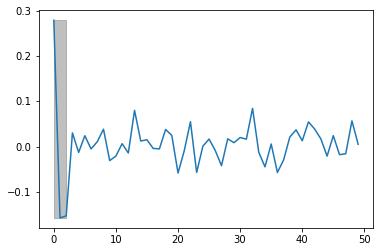

In [9]:
sample_returns = generate_monte_carlo_sample()
import matplotlib.pyplot as plt
x_values = [i for i in range(T)]
y_values = [array[1][0] for array in sample_returns]
regimes_for_this_sample = [array[0] for array in sample_returns]
flig,ax = plt.subplots()
ax.plot(x_values,y_values)
ax.fill_between(x_values,min(y_values),max(y_values),where = [regimes_for_this_sample[i]==1 for i in range(T)],color = 'grey',alpha = 0.5)
plt.show()

## Probabilty set initialization over different regimes

In [10]:
from itertools import product
from scipy.optimize import minimize
discrete_prob = 50
prob_set = []
for i in range(discrete_prob+1):
    prob_set.append(1/(discrete_prob)*i)

combinations = product(prob_set, repeat=N)
possible_probabities = [vector for vector in combinations if sum(vector) == 1]
reverse_index = {}
for _,p in enumerate(possible_probabities):
    reverse_index[p]= _

possible_probabities = [np.array(x) for x in possible_probabities]


In [11]:
delta_pi = 0.01
pi_set = []
curr_pi = -1
while curr_pi<=1+1e-5:
    pi_set.append(curr_pi)
    curr_pi+=delta_pi

pi_combinations = product(pi_set,repeat=n)
possible_pi = [np.append(np.array(vector),1-np.sum(vector)) for vector in pi_combinations]


In [12]:
print(possible_pi[-1])

[ 1.00000000e+00 -1.33226763e-15]


In [13]:
def closest_probability_distn(p_in):
    lowest_norm = float('inf')
    ind = 0

    for _,array in enumerate(possible_probabities):
        norm = np.linalg.norm(p_in - array)
        if norm < lowest_norm:
            lowest_norm = norm
            closest_array = array
            ind = _

    return ind,closest_array

def updateBelief(r,p):
    #print(r,p)
    p_new = []
    #print(r)
    r = r[:-1]
    density = np.zeros(N);
    for i in range(N):
        mvn = multivariate_normal(mean=regimes[i][0], cov = regimes[i][1])
        density[i]= mvn.pdf(r)

    p_new = np.zeros(N)
    for i in range(N):
        for j in range(N):
            p_new[i]+= density[j]*tpm[j][i]*p[j]

    p_new/=np.sum(p_new)
    closest_p_ind,_ = closest_probability_distn(p_new)
    return p_new,closest_p_ind

def newWealth(r, pi):
    W_new = 0
    for i in range(n+1):
        W_new+= pi[i]*(1+r[i])
    return W_new

In [14]:
T = 5
V = {}
for _ in range(len(possible_probabities)):
    V[(_,T)] = (1**gamma)/gamma


t = T-1
M = 200
pi_l = -1.0
pi_u = 1.0


optimal_pi_star = {}

# scenarios = []_star = {}
for iter in range(1):
#     scenarios = []
#     for j in range(M):
#         sample = generate_monte_carlo_sample()
#         scenarios.append(sample)
#     print("Samples generated")
    t = T-1
    while (t>=0):
        #returns_at_this_time = [scenarios[i][t][1] for i in range(M)]
        #print(returns_at_this_time)
        for _ in range(len(possible_probabities)):
            returns_at_this_time = []
            for j in range(M):
                sample = generate_scenario(possible_probabities[_],t)
                returns_at_this_time.append(sample)


            def objective_function(pi):
                return np.average([(newWealth(returns_at_this_time[i],pi)**gamma)*V[(updateBelief(returns_at_this_time[i],possible_probabities[_])[1],t+1)] for i in range(M)])

            constraints = ([{'type': 'eq', 'fun': lambda pi: np.sum(pi) - 1}])  
            initial_pi_guess = np.ones(n+1)
            initial_pi_guess/=np.sum(initial_pi_guess)
            

            pi_star = minimize(lambda x: (-1)*objective_function(x),  initial_pi_guess,
                               constraints=constraints,
                                bounds = [(pi_l,pi_u) for i in range(n)] + [(None,None)]
                                 )

            #pi_star = max(possible_pi,key = objective_function)
            print(pi_star.message)
            pi_star = pi_star.x
            V[(_,t)] = np.average([(newWealth(returns_at_this_time[i],pi_star)**gamma)*V[(updateBelief(returns_at_this_time[i],possible_probabities[_])[1],t+1)] for i in range(M)])
            optimal_pi_star[(_,t)] = pi_star
            print(iter,t,possible_probabities[_],pi_star)

        t= t-1
        print("\n")



Optimization terminated successfully
0 4 [0. 1.] [-0.03745054  1.03745054]
Optimization terminated successfully
0 4 [0.02 0.98] [-0.27005499  1.27005499]
Optimization terminated successfully
0 4 [0.04 0.96] [-0.14876359  1.14876359]
Optimization terminated successfully
0 4 [0.06 0.94] [0.15800573 0.84199427]
Optimization terminated successfully
0 4 [0.08 0.92] [-0.35364213  1.35364213]
Optimization terminated successfully
0 4 [0.1 0.9] [-0.00532914  1.00532914]
Optimization terminated successfully
0 4 [0.12 0.88] [0.21032912 0.78967088]
Optimization terminated successfully
0 4 [0.14 0.86] [0.5 0.5]
Optimization terminated successfully
0 4 [0.16 0.84] [-0.25446251  1.25446251]
Optimization terminated successfully
0 4 [0.18 0.82] [-0.25077701  1.25077701]
Optimization terminated successfully
0 4 [0.2 0.8] [-0.00706905  1.00706905]
Optimization terminated successfully
0 4 [0.22 0.78] [0.34213229 0.65786771]
Optimization terminated successfully
0 4 [0.24 0.76] [-0.38282473  1.38282473]
Opt

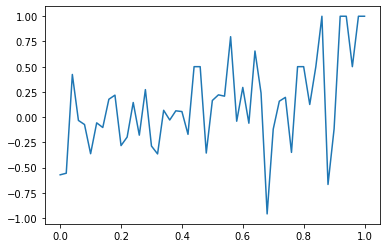

In [15]:
import matplotlib.pyplot as plt

xpoints = [x[0] for x in possible_probabities]
ypoints = [optimal_pi_star[_,1][0] for _ in range(len(possible_probabities))]

plt.plot(xpoints,ypoints)
plt.show()

#print([optimal_pi_star[_,0] for _ in range(5)])

In [16]:
# for _ in range(len(possible_probabities)):
#     print(possible_probabities[_])
#     print(V[(_,0)])

# Neural Network using Dynamic Program solution as a startpoint

In [17]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import torch
import torch.nn as nn
import torch.optim as optim


C:\Users\91897\AppData\Local\Temp\ipykernel_10576\2325149933.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model_input_data = [[torch.tensor(input_data[i],requires_grad=True),


243
2500


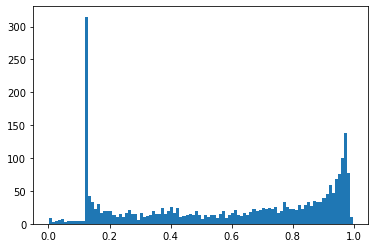

In [314]:
#Training data
n_samples = 500

input_data = []
return_samples= []
cnt0 = 0
plot_x = []
for i in range(n_samples):
    sample = generate_monte_carlo_sample()
    if(sample[0][0]==0):
        cnt0+=1
    returns_for_this_sample = []
    for time in range(T):
        returns_for_this_sample.append(sample[time][1])
    return_samples.append(returns_for_this_sample)
    #return_samples.append()
    initial_p = np.random.rand(N)
    plot_x.append(initial_p[0])
    initial_p/=np.sum(initial_p)
    input_to_rnn = [initial_p]
    for time in range(T-1):
        p = input_to_rnn[-1]
        p_new,___ = updateBelief(sample[time][1],p)
        #p_new = closest_probability_distn(p_new)[1]
        plot_x.append(p_new[0])
        input_to_rnn.append(p_new)
    input_data.append(input_to_rnn)
input_data = torch.tensor(input_data,dtype= torch.float32)

model_input_data = [[torch.tensor(input_data[i],requires_grad=True),
                     torch.tensor(1000.0,requires_grad=True),
                     torch.ones(n+1,requires_grad=True)/(n+1),
                     torch.tensor(return_samples[i],requires_grad = True)] for i in range(n_samples)]

print(cnt0)
print(len(plot_x))


import matplotlib.pyplot as plt
plt.hist(plot_x,bins = 100)
plt.show()

In [315]:
print(model_input_data[0])

In [ ]:
from tqdm import tqdm

transaction_rate = 0.015


class CustomRNNCell(nn.Module):
    def __init__(self, input_size, output_size):
        super(CustomRNNCell, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        # self.rnn = nn.RNN(input_size, hidden_size = 2*output_size, num_layers = 1, batch_first=False)
        self.fc1 = nn.Sequential(
            nn.Linear(input_size, 80, bias=True),
            nn.Tanh(),  # ReLU activation for better sensitivity
            #nn.BatchNorm1d(80),  # Batch normalization
            nn.Linear(80, 40, bias=True),
            nn.Tanh(),  # ReLU activation
            #nn.BatchNorm1d(40),  # Batch normalization
            nn.Linear(40, 20, bias=True),
            nn.Tanh(),  # ReLU activation
            #nn.BatchNorm1d(20),  # Batch normalization
            nn.Linear(20, output_size),
            nn.Sigmoid()
        )

        self.fc2 = nn.Sequential(
            nn.Linear(input_size, 80, bias=True),
            nn.Tanh(),  # Tanh activation
            #nn.BatchNorm1d(80),  # Batch normalization
            nn.Linear(80, 40, bias=True),
            nn.Tanh(),  # Tanh activation
            #nn.BatchNorm1d(40),  # Batch normalization
            nn.Linear(40, 20, bias=True),
            nn.Tanh(),  # Tanh activation
            #nn.BatchNorm1d(20),  # Batch normalization
            nn.Linear(20, output_size, bias=True),
            nn.Sigmoid()
        )


    def forward(self, x):
        out_l = self.fc1(x)
        out_u = self.fc2(x)
        return out_l,out_u



class Model(nn.Module):
    def __init__(self, crra_coefficient,input_size,output_size):
        super(Model, self).__init__()
        self.crra_coefficient = crra_coefficient
        self.RNN  = CustomRNNCell(input_size,output_size)

    def forward(self, x):
        inputs_to_cell = x[0]
        inital_wealth = x[1]
        initial_portfolio = x[2]
        returns_sequence = x[3]

        wealth = [inital_wealth]
        portfolio = [initial_portfolio]
        pi_star_arrays = []
        
        pi_star_arrays = []
        for i in range(T):
            closest_p_ind,__ = closest_probability_distn(inputs_to_cell[i].detach().numpy())
            pi_star = torch.tensor(optimal_pi_star[(closest_p_ind,i)],requires_grad=True)
            pi_star_arrays.append(pi_star)

        lower_bounds = []
        upper_bounds = []

        for i in range(T):
            w = wealth[-1]
            pi = portfolio[-1]
            
            pi_new = pi[:-1]

            l_b,u_b = self.RNN(inputs_to_cell[i])
            l_b.retain_grad()
            u_b.retain_grad()
           
            
            u_b_clipped = torch.min(torch.ones(n),torch.add(pi_star_arrays[i][:-1],u_b))
            l_b_clipped = torch.max(-torch.ones(n),torch.add(pi_star_arrays[i][:-1],-l_b))
            pi_new = torch.max(l_b_clipped,torch.min(u_b_clipped,pi_new))  
            lower_bounds.append(l_b_clipped)
            upper_bounds.append(u_b_clipped)
            risk_free_allocation = torch.tensor(1.0)-torch.sum(pi_new)
            
            pi_new = torch.stack((pi_new.squeeze(),risk_free_allocation))
            portfolio.append(pi_new)
            

            new_wealth = w*torch.sum(torch.mul(pi,torch.add(torch.ones(n+1),returns_sequence[i]))) 
            new_wealth = torch.subtract(new_wealth,new_wealth*transaction_rate*torch.norm(pi-pi_new,p = 1))
            
            wealth.append(new_wealth)
            

        return portfolio,lower_bounds,upper_bounds,wealth




In [ ]:

model = Model(crra_coefficient = -1,input_size = N,output_size = n)
crra_coefficient = -1
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 100
loss_hist=[]
# Training Loop
for epoch in range(n_epochs):
  print("Epoch:",epoch)
  sz = 1
  avg_loss = 0
  for idx, X in tqdm(enumerate(model_input_data)):
   
    optimizer.zero_grad()
    portfolios,lower_bounds,upper_bounds,wealth = model(X)
    loss = -(wealth[-1]**crra_coefficient)/crra_coefficient
    loss.backward(
        retain_graph = True
    )
    #print(loss.grad)
    optimizer.step()

    avg_loss+= loss.item()
    sz+=1

  avg_loss/=sz
  loss_hist.append(avg_loss)
  print("Loss: ",avg_loss)

[0. 1.] [0.9702168] [0.9957141]
[0.02 0.98] [0.97050923] [0.99572045]
[0.04 0.96] [0.97078776] [0.99572635]
[0.06 0.94] [0.9710532] [0.995732]
[0.08 0.92] [0.971306] [0.99573743]
[0.1 0.9] [0.971547] [0.9957426]
[0.12 0.88] [0.9717765] [0.9957475]
[0.14 0.86] [0.97199506] [0.9957522]
[0.16 0.84] [0.97220325] [0.99575657]
[0.18 0.82] [0.9724015] [0.99576086]
[0.2 0.8] [0.9725902] [0.99576473]
[0.22 0.78] [0.97276986] [0.99576855]
[0.24 0.76] [0.9729408] [0.99577206]
[0.26 0.74] [0.97310364] [0.9957754]
[0.28 0.72] [0.97325844] [0.99577844]
[0.3 0.7] [0.97340584] [0.9957814]
[0.32 0.68] [0.973546] [0.9957841]
[0.34 0.66] [0.97367936] [0.9957866]
[0.36 0.64] [0.9738062] [0.995789]
[0.38 0.62] [0.9739267] [0.9957911]
[0.4 0.6] [0.9740414] [0.9957931]
[0.42 0.58] [0.9741503] [0.9957949]
[0.44 0.56] [0.97425383] [0.99579656]
[0.46 0.54] [0.9743522] [0.99579793]
[0.48 0.52] [0.97444564] [0.99579924]
[0.5 0.5] [0.9745343] [0.99580044]
[0.52 0.48] [0.97461855] [0.9958014]
[0.54 0.46] [0.9746985

[0.88 0.12] [0.97555894] [0.99579287]
[0.9 0.1] [0.97558767] [0.99579096]
[0.92 0.08] [0.9756144] [0.995789]
[0.94 0.06] [0.97563964] [0.9957867]
[0.96 0.04] [0.9756631] [0.9957842]
[0.98 0.02] [0.9756851] [0.9957818]
[1. 0.] [0.97570556] [0.99577904]


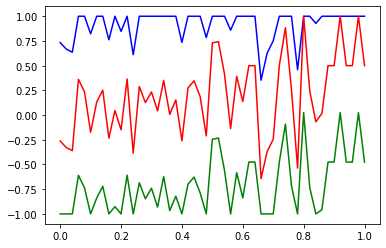

In [329]:
import matplotlib.pyplot as plt
x_values = []
upper_b = []
lower_b = []
portfolio_values = []
for p in possible_probabities:
    p_normal = p[0]
    x_values.append(p_normal)
    pi_star = optimal_pi_star[(reverse_index[tuple(p)],2)]
    portfolio_values.append(pi_star[0])
    l_b,u_b = model.RNN(torch.tensor(p,dtype = torch.float32))
    l_b = l_b.detach().numpy()
    u_b = u_b.detach().numpy()
    print(p,l_b,u_b)
    lower_b.append(max(-1.0,(pi_star[0]-l_b)))
    upper_b.append(min(1.0,(pi_star[0]+u_b)))


plt.plot(x_values,lower_b,color= 'g')
plt.plot(x_values,upper_b,color = 'b')
plt.plot(x_values,portfolio_values,color = 'r')
plt.show()